In [1]:
%pylab inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','svg', 'png')
from models import boson2d as mod
from mps.mps import iMPS
from mps import mpo
import cPickle
from algorithms import DMRG
from algorithms import simulation as simulation
from algorithms.linalg import np_conserved as npc

Populating the interactive namespace from numpy and matplotlib
Loaded libmkl_rt.so for dgesvd
Loaded libmkl_rt.so for zgesvd
Loaded libiomp5.so for omp
Running with omp_max_threads= 8


In [2]:
#Standard
def YC2nopen(n, Jv, Jh):
    h = [ [ (1, 0, Jv), (0, 1, Jh)] ]*(n-1) +  [  [(0, 1, Jh)] ]
    
    #h = [ [ (1, 0, Jv), (0, 1, Jh)] , [ (1, 0, 0.2*Jv), (0, 1, Jh)],  [(0, 1, Jh)] ]
    return h
def ax(n):
    return np.array([1, 0.])
def ay(n):
    return np.array([0, 1.])
a1 = 1/2.; a2 = np.sqrt(3)/2.;
def site_pos(n):
    return np.array([  [0, 0.] ])

In [32]:
Jv = 1.
Jh = 1.
g = 3.5
n = 6
L = n
Ly = L
model_par = {'verbose':1, 'dtype':np.float, 'Lx':n, 'nu':(1, 2), 'd':2, 'cons_q':False,
             'U': YC2nopen(n, -4*Jv, -4*Jh),
             'ax': ax(n),
             'ay': ay(n),
             'Ly':Ly,
             'Del': [g]*n, 
             'site_pos': site_pos(n),
             }
M = mod.boson2d_model(model_par)
print M.chi

	Lx = 6
	Ly = 6
	nu = (1, 2)
	d = 2
	ax = [ 1.  0.]
	ay = [ 0.  1.]
	site_pos = [[ 0.  0.]]
	cons_q = False
	dtype = <type 'float'>
	U = [[(1, 0, -4.0), (0, 1, -4.0)], [(1, 0, -4.0), (0, 1, -4.0)], [(1, 0, -4.0), (0, 1, -4.0)], [(1, 0, -4.0), (0, 1, -4.0)], [(1, 0, -4.0), (0, 1, -4.0)], [(0, 1, -4.0)]]
	Del = [3.5, 3.5, 3.5, 3.5, 3.5, 3.5]
Detecting MPO charges...
	Trimming MPO chi[0]: 8 -> 4
	Trimming MPO chi[1]: 8 -> 5
	Trimming MPO chi[2]: 8 -> 6
	Trimming MPO chi[3]: 8 -> 7
	Trimming MPO chi[30]: 8 -> 7
	Trimming MPO chi[31]: 8 -> 6
	Trimming MPO chi[32]: 8 -> 5
	Trimming MPO chi[33]: 8 -> 4
	Trimming MPO chi[34]: 8 -> 3
	Trimming MPO chi[35]: 8 -> 2
Init model with num_q = 0
[4 5 6 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 6 5 4 3 2]


In [33]:
p = [0]*(n*Ly)
psi = iMPS.product_imps(M.d, p, dtype=np.float, conserve = M, bc='finite')
sim = simulation.simulation(psi, M)

In [41]:
sim_par =  {'CHI_LIST':{0:320},
            'TRUNC_CUT':10**(-10),
            'VERBOSE': True,
            'N_STEPS': 1,
            'UPDATE_ENV': 0,
            'STARTING_ENV_FROM_PSI': 1,
            'MAX_ERROR_E' :10**(-9),
            'MAX_ERROR_S' : 1*10**(-3),
            'MIN_STEPS' : 5,
            'MAX_STEPS': 15,
            'SVD_MAX' : 28.,
            'save_mem': False,
            'LANCZOS_PAR' : {'N_min':2, 'N_max':14, 'p_tol': 10**(-6), 'p_tol_to_trunc': 1/25., 'cache_v':np.inf},
            'mixer':(0.01, 2., 8, 'id'),
            'DISPLAY_ESTATS':False
            }
sim.dmrg_par = sim_par

In [42]:
sim_par['STARTING_ENV_FROM_PSI'] = 1
#sim.dmrg_par['CHI_LIST'] = {0:100, 1:300,}# 2:400, 3:500, 4:600}
#sim.dmrg_par['CHI_LIST'] = {0:600, 1:900, 2:1200, 3:1500, 4:1800, 5:2100, 6:2400}
#sim.dmrg_par['CHI_LIST'] = {0:2100, 1:2400, 2:2700, 3:3000}
#sim.dmrg_par['CHI_LIST'] = {0:3200, 1:3400}
#sim.dmrg_par['CHI_LIST'] = {0:600, 1:900, 2:1200, 3:1500, 4:1800}
sim.dmrg_par['CHI_LIST'] = {0:512}
#sim.dmrg_par['CHI_LIST'] = {0:400, 1:600, 2:800}
sim.dmrg_par['mixer'] = (1e-5, 2., 6, 'id')
sim.dmrg_par['MIN_STEPS'] = 12
sim.dmrg_par['MAX_STEPS'] = 16
sim.ground_state()
psi.canonical_form()

Finding ground state...
Using 0_new  engine.
Initializing environment from sim_par.
Beginning optimization...
this sim has  31557384 s before everything is shelved
Changing to chi max = 512
Peak memory used (mb) 222.40625  Time elapsed 8.9
 ----> step =    1   chi = [[2, 3], [4, 8], [8, 15], [16, 28], [32, 52], [58, 88], [76, 108], [87, 114], [99, 121], [112, 128], [123, 134], [128, 135], [133, 140], [134, 141], [134, 141], [134, 141], [135, 140], [132, 137], [136, 142], [135, 142], [136, 141], [133, 138], [131, 135], [127, 131], [123, 127], [114, 116], [105, 107], [95, 96], [83, 83], [59, 59], [32, 32], [17, 16], [9, 8], [5, 4], [3, 2], 1]  Normerr = -1  ESys = -130.6117099998670597   Sbond = nan 
 Etrunc = 4.5993e-09   Ptrunc = 9.3858e-11   D_ESys = -1.3061e+02   D_S = 0.0000e+00 

Peak memory used (mb) 222.40625  Time elapsed 15.5
 ----> step =    2   chi = [[2, 3], [4, 7], [8, 14], [16, 26], [32, 48], [58, 83], [76, 102], [87, 108], [100, 119], [113, 126], [125, 133], [129, 134], [

In [43]:
sim.sim_stats[-1]['Es'][-1]/n/Ly #100

-3.6281030771668719

In [45]:
4**6

4096

In [50]:
edmrg = sim.sim_stats[-1]['Es'][-1]/n/Ly #8
print edmrg

-1.00335300613


In [28]:
edmrg = sim.sim_stats[-1]['Es'][-1]/n/Ly #12
print edmrg

-6.07101062618


In [59]:
edmrg = -16.0604129141/16.
print edmrg

-1.00377580713


In [31]:
edmrg - -6.07096185

-4.8776175783693532e-05

[ -9.33029837e-04  -1.05304715e+00]


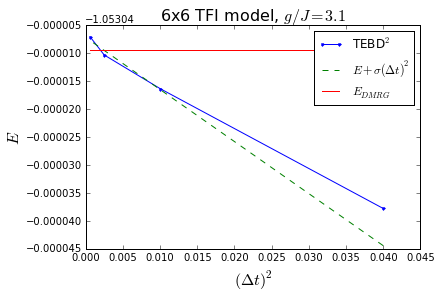

In [49]:
#e = [-1.0033787211156406, -1.0032284920327037, -1.0026129607094452, -1.0023259287209334]
e = [-1.0530746446726094, -1.0530453679946923, -1.0530287429922882, -1.0528690844612238]
e = [-1.0530778082465613, -1.0530563202071217, -1.0530503033977163, -1.0530470825952114]
dts = np.array([0.2, 0.1, 0.05, 0.025])
fit =  np.polyfit(dts[1:]**2, e[1:], 1)
print fit
plot(dts**2, e, '.-')
plot(dts**2, fit[1] + fit[0]*dts**2, '--')
plot(dts**2, 0*dts + edmrg)
xlabel('$(\Delta t)^2$', fontsize = 16)
ylabel('$E$', fontsize = 16)
legend([r'TEBD$^2$', r'$E + \sigma (\Delta t)^2$', r'$E_{DMRG}$'])
title(r'6x6 TFI model, $g/J = 3.1$', fontsize = 16)
#savefig('TEBD2.pdf')

[-1.31312016 -6.07079846]


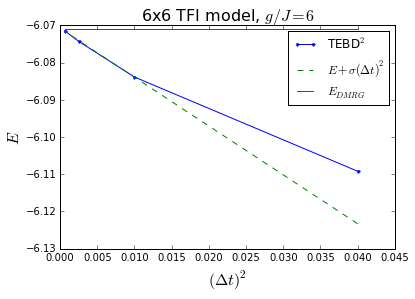

In [13]:
e = [-6.1092151384001543, -6.0838855516292449, -6.0743018002250322, -6.0714427252015133]
dts = np.array([0.2, 0.1, 0.05, 0.025])
fit =  np.polyfit(dts[1:]**2, e[1:], 1)
print fit
plot(dts**2, e, '.-')
plot(dts**2, fit[1] + fit[0]*dts**2, '--')
plot(dts**2, 0*dts + edmrg)
xlabel('$(\Delta t)^2$', fontsize = 16)
ylabel('$E$', fontsize = 16)
legend([r'TEBD$^2$', r'$E + \sigma (\Delta t)^2$', r'$E_{DMRG}$'])
title(r'6x6 TFI model, $g/J = 6$', fontsize = 16)
savefig('TEBD2.pdf')

[-1.16338357 -6.06443399]


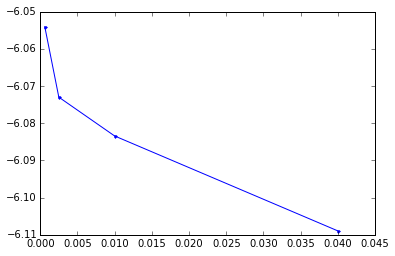

In [396]:
e = [-6.108947358613209, -6.083428980076186, -6.0729982513107545, -6.0541661392708095]
dts = np.array([0.2, 0.1, 0.05, 0.025])
print np.polyfit(dts**2, e, 1)
plot(dts**2, e, '.-')

[-0.6816886  -3.38753188]


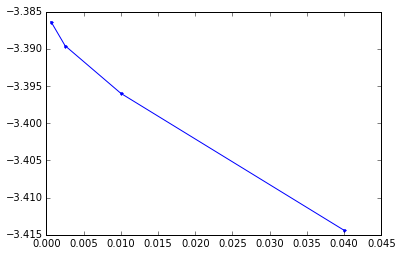

In [395]:
dts = np.array([0.2, 0.1, 0.05, 0.025])
print np.polyfit(dts**2, [-3.4143927396112637, -3.3959876401020037, -3.389582032860734, -3.3863798038316308], 1)
plot(dts**2, [-3.4143927396112637, -3.3959876401020037, -3.389582032860734, -3.3863798038316308], '.-')

In [366]:
dts = np.array([0.1, 0.05, 0.025])
print np.polyfit(dts**2, [-6.0839056282820865, -6.0743257224506362, -6.0714794835304682], 1)

[-1.31170268 -6.07083158]


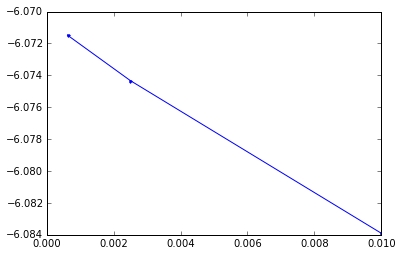

In [365]:
plot(dts**2, [-6.0839056282820865, -6.0743257224506362, -6.0714794835304682], '.-')

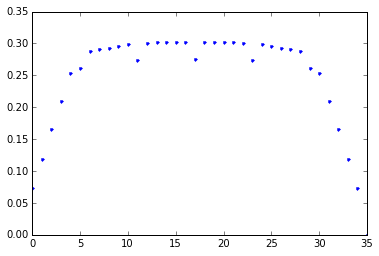

In [379]:
plot(psi.entanglement_entropy(), '.')

In [387]:
ZZ = psi.correlation_function(M.dN, M.dN, [int(L*(L+1)/2.)], range(psi.L)).reshape((-1, n))

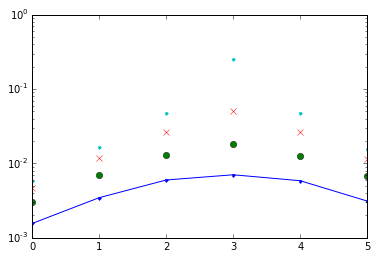

In [388]:
plot(ZZ[:, 0], '.-')
plot(ZZ[:, 1], 'o')
plot(ZZ[:, 2], 'x')
plot(ZZ[:, 3], '.')
#xscale('log')
yscale('log')

<matplotlib.colorbar.Colorbar instance at 0x114c1dc20>

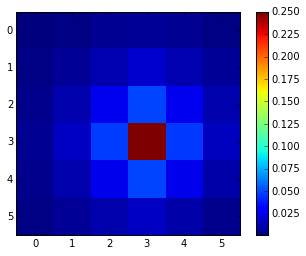

In [389]:
imshow(ZZ.T, interpolation='nearest')
colorbar()

In [209]:
psi.combine_sites(3)

data = []
for b in psi.B:
    b = b.to_ndarray().reshape( (2,)*3 + (b.shape[1], b.shape[2]))
    b = b.reshape((2**1, 2**2) +  (b.shape[-2], b.shape[-1]))
    data.append(b)
with open('3TFI_JH1.4.mps', 'w') as f:
    cPickle.dump(data, f, -1)

ValueError: L = 20 not divisible by 3 

In [295]:
psi.combine_sites(4)

data = []
for b in psi.B:
    b = b.to_ndarray().reshape( (2,)*4 + (b.shape[1], b.shape[2]))
    b = b.reshape((2**1, 2**3) +  (b.shape[-2], b.shape[-1]))
    data.append(b)
with open('4TFI_JH0.1.mps', 'w') as f:
    cPickle.dump(data, f, -1)

In [2]:
cd ../

/Users/mzaletel/mosesmove


In [12]:
import MZsplitter
import tebd

dts [ 0.2  0.1]


ValueError: axes don't match array

In [12]:
tebd = reload(tebd)

In [ ]:
        2620067 function calls in 9.306 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    21345    2.152    0.000    2.567    0.000 linalg.py:1225(svd)
    76648    1.373    0.000    1.373    0.000 {numpy.core._dotblas.dot}
    11652    0.976    0.000    0.976    0.000 {numpy.core._dotblas.vdot}
    55968    0.745    0.000    2.706    0.000 numeric.py:1106(tensordot)
     1872    0.579    0.000    5.995    0.003 MZsplitter.py:50(split_psi)

In [ ]:
 2643009 function calls in 12.324 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    23108    3.421    0.000    3.991    0.000 linalg.py:1225(svd)
    76229    1.997    0.000    1.997    0.000 {numpy.core._dotblas.dot}
    11876    1.413    0.000    1.413    0.000 {numpy.core._dotblas.vdot}
    56864    0.856    0.000    3.588    0.000 numeric.py:1106(tensordot)
     1872    0.676    0.000    8.542    0.005 MZsplitter.py:50(split_psi)

In [13]:
%lprun  -f MZsplitter.split_psi tebd.run()

dts [ 0.2  0.1]
 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00 
      1.1e-15  0.0e+00  2.2e-15  3.1e-15  2.0e-15 

 4.4e-16  2.0e-07  2.0e-07  2.1e-07  2.1e-07  2.2e-07 
      5.1e-08  1.0e-07  4.9e-08  4.9e-08  5.5e-08 

 9.9e-08  5.2e-07  5.7e-07  7.6e-07  6.4e-07  4.9e-07 
      1.0e-06  9.7e-07  7.8e-07  8.7e-07  1.2e-06 

 3.1e-07  1.7e-06  1.3e-06  1.6e-06  8.5e-07  1.9e-06 
      1.5e-06  2.4e-06  2.0e-06  2.4e-06  1.1e-06 

 7.2e-07  1.9e-06  1.2e-06  2.6e-06  1.8e-06  7.9e-07 
      1.6e-06  2.0e-06  2.0e-06  3.1e-06  2.3e-06 

 2.2e-06  2.8e-06  2.7e-06  3.0e-06  8.5e-07  2.3e-07 
      1.4e-06  2.6e-06  2.5e-06  3.6e-06  2.1e-06 

 3.2e-06  3.3e-06  2.5e-06  4.0e-06  2.1e-06  1.2e-06 
      1.7e-06  1.8e-06  3.1e-06  3.2e-06  1.3e-06 

 3.4e-06  3.5e-06  3.2e-06  3.4e-06  6.8e-07  1.0e-06 
      1.8e-06  2.5e-06  3.2e-06  3.2e-06  2.0e-06 

E -1.0026482435
 3.8e-06  3.3e-06  3.2e-06  3.5e-06  2.1e-06  3.7e-07 
      1.9e-06  2.8e-06  3.1e-06  2.9e-06  2.1e-06 

 3.0e

In [182]:
%timeit gemm(1, A.T, A.T, trans_b=True)

10 loops, best of 3: 24.2 ms per loop


In [175]:
%timeit np.dot(A.T, A)

10 loops, best of 3: 24.6 ms per loop


In [178]:
%timeit x = syrk(1., A.T, trans=1)

10 loops, best of 3: 22.4 ms per loop


In [7]:
syrk = sp.linalg.get_blas_funcs('syrk', [A])
gemm = sp.linalg.get_blas_funcs('gemm', [A])
symm = sp.linalg.get_blas_funcs('symm', [A])

In [15]:
%timeit syrk(1., A)

1000 loops, best of 3: 486 µs per loop


In [16]:
%timeit np.dot(A, A.T)

1000 loops, best of 3: 487 µs per loop


In [8]:
%timeit symm(1., syrk(1., A), B)

The slowest run took 7.24 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 14.4 µs per loop


In [5]:
%timeit np.dot(np.dot(A, A.T), B)

The slowest run took 11.06 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 16.8 µs per loop


In [2]:
import scipy as sp
import numpy as np
from scipy import linalg

In [12]:
N = 144
M = 864
A = np.asfortranarray(np.random.random((N, M))-0.5)
B = np.asfortranarray(np.random.random((N, N))-0.5)
C = np.ones((N, N))

In [176]:
%timeit np.tensordot(A, A, axes = [[1], [1]])

100 loops, best of 3: 3.18 ms per loop


In [3]:
%timeit np.dot(A.T, A)

1 loops, best of 3: 177 ms per loop


In [196]:
sp.version.version

'0.14.0.dev-7cefb25'

In [4]:
%lprun?